In [3]:
import cv2
from utils import *
import api
import matplotlib.pyplot as plt
import numpy as np
import os
from qr_code import check_square

%load_ext autoreload
%autoreload 2
%matplotlib inline

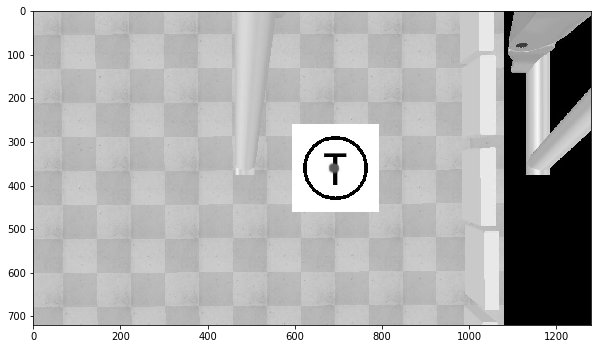

In [4]:
img = read_image('testcase/cylinder.jpg')
gray = get_gray(img)
show_image(gray, gray=True)

True


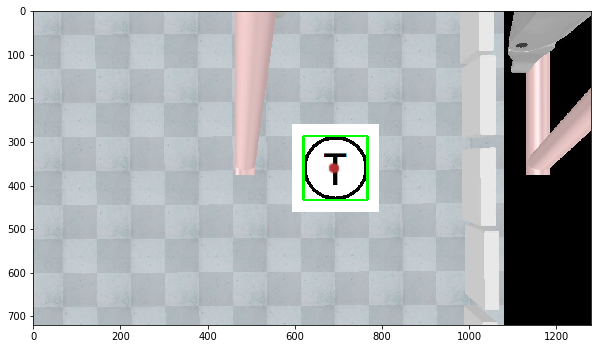

The letter is: T


In [12]:
flag, ((min_x, min_y, max_x, max_y), letter) = api.get_E_or_T(img)
print(flag)
asd = img.copy()
cv2.rectangle(asd, (min_x, min_y), (max_x, max_y), (0, 255, 0), 3)
show_image(asd)
print('The letter is: ' + letter)

In [6]:
ret,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# show_image(th1, gray=True)

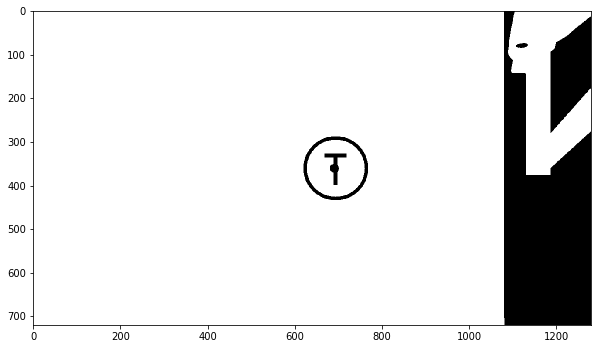

In [7]:
tmp = cv2.blur(th1, (2,2))
show_image(tmp, gray=True)

num of contours: 6


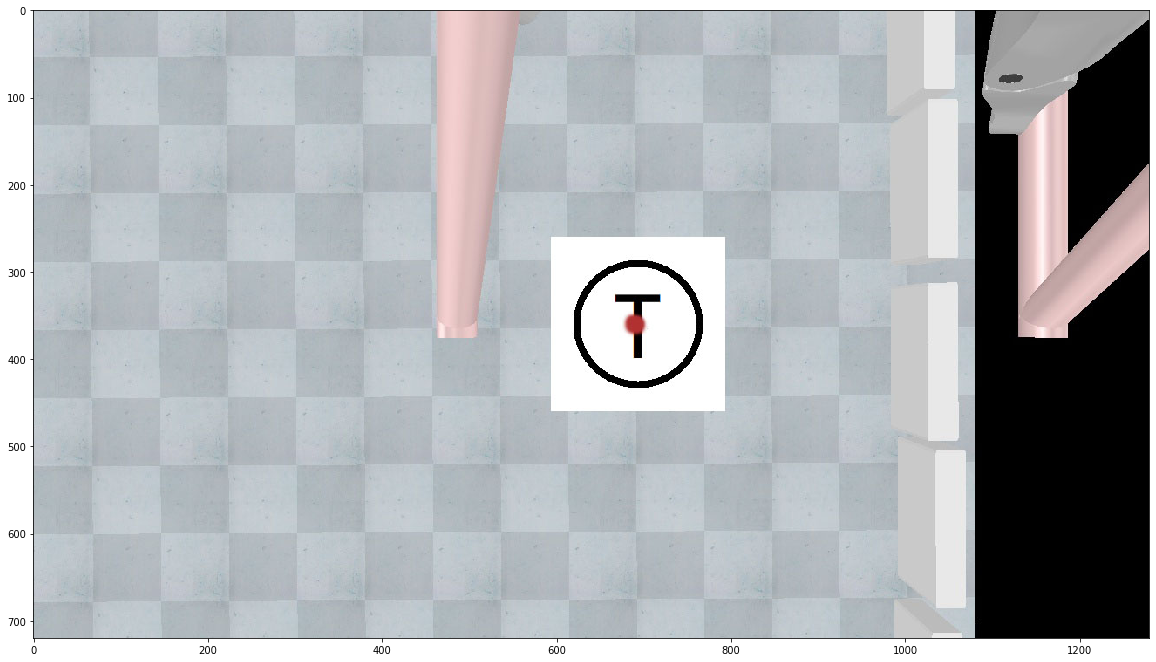

In [8]:
contours, hierarchy = cv2.findContours(tmp.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
# contours, hierarchy = cv2.findContours(th1.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
print('num of contours:', len(contours))
# print(contours)
new_contours = []
for j, contour in enumerate(contours):
    points = []
    for i in range(contour.shape[0]):
        points.append((contour[i][0][0], contour[i][0][1]))
    flag, mid = check_square(points)
    if flag:
        new_contours.append(contour)
img2 = img.copy()
cv2.drawContours(img2,new_contours,-1,(0,255,0),1)
show_image(img2, figsize=(20, 20))

In [9]:
num = len(contours)
hh = hierarchy[0]
print(hierarchy)
that = []
for i in range(num):
    if hh[i][2] == -1:
        continue
    j = hh[i][2]
    if hh[j][0] != -1 or hh[j][1] != -1:
        continue
    if hh[j][2] == -1:
        continue
    j = hh[j][2]
    if hh[j][0] != -1 or hh[j][1] != -1 or hh[j][2] != -1:
        continue
    that.append(i)
if len(that) != 1:
    print('Error')
cc = contours[that[0]]
print(cc.min(axis=0))
min_x = cc.min(axis=0)[0][0]
min_y = cc.min(axis=0)[0][1]
max_x = cc.max(axis=0)[0][0]
max_y = cc.max(axis=0)[0][1]
print(min_x, min_y, max_x, max_y)
print(tmp.shape)

new_img = tmp[min_y : max_y + 1, min_x : max_x + 1]
print(new_img.shape)
# show_image(new_img, gray=True)

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [-1  0  3 -1]
  [-1 -1  4  2]
  [-1 -1  5  3]
  [-1 -1 -1  4]]]
[[620 287]]
620 287 768 433
(720, 1280)
(147, 149)


In [28]:
m, n = new_img.shape
print(m, n)
letter = new_img[m // 5 : m - m // 5, n // 5 : n - n // 5]
# show_image(letter, gray=True)

146 148


In [29]:
letter2 = rotate(letter, 180)
myletter = np.int64(letter) * np.int64(letter2)
myletter[myletter > 0] = 255
myletter = np.uint8(myletter)
# show_image(myletter, gray=True)

In [30]:
cc2, hh2 = cv2.findContours(myletter.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_L1)

ans = '?'

if len(cc2) == 2:
    ans = 'T'
else:
    ans = 'E'

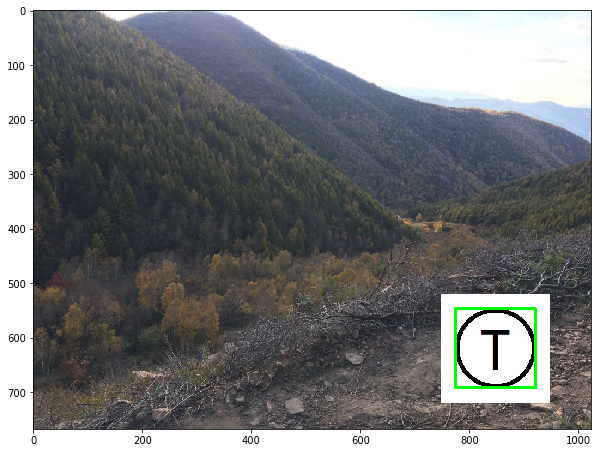

The letter is: T


In [31]:
asd = img.copy()
cv2.rectangle(asd, (min_x, min_y), (max_x, max_y), (0, 255, 0), 3)
show_image(asd)
print('The letter is: ' + ans)